**Import Module**

In [67]:
import gymnasium as gym
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

**Predict Expert action based on State (s) and Action (a)**

In [61]:
# s is any state and a is any action
def svm(s, a):
    return 1

[[[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [8 1 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]]]
(2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 8, 1, 0, 1, 0, 0, 1, 0, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 5, 0)
[[[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2

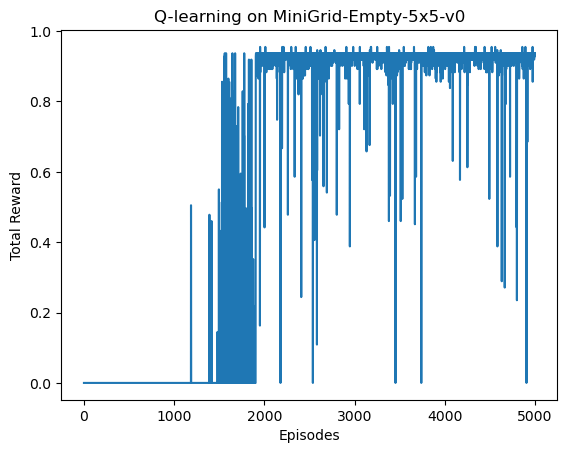

In [ ]:


env = gym.make("MiniGrid-Empty-5x5-v0", render_mode=None)

def extract_state(obs):
    return tuple(obs['image'].flatten())  # 7x7x3 -> 147D flattened tuple

alpha = 0.1      # learning rate
gamma = 0.99     # discount factor
epsilon = 0.1    # exploration rate
episodes = 5000

q_table = {}     # key: (state, action) -> value

def get_q(state, action):
    return q_table.get((state, action), 0.0)

def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        q_values = [get_q(state, a) for a in range(env.action_space.n)]
        return int(np.argmax(q_values))

reward_list = []

for ep in range(episodes):
    obs, _ = env.reset()
    print(obs['image'])
    state = extract_state(obs)
    print(state)
    total_reward = 0

    done = False
    while not done:
        action = choose_action(state)
        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_state = extract_state(next_obs)

        best_next_q = max([get_q(next_state, a) for a in range(env.action_space.n)])
        q_table[(state, action)] = get_q(state, action) + alpha * (reward + gamma * best_next_q - get_q(state, action))

        state = next_state
        total_reward += reward

    reward_list.append(total_reward)

plt.plot(reward_list)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-learning on MiniGrid-Empty-5x5-v0')
plt.show()


In [ ]:
expert_policy = {}

for (state, action), q_value in q_table.items():
    if state not in expert_policy:
        state_q_value = [get_q(state, action) for action in range(env.action_space.n)]
        best_action = int(np.argmax(state_q_value))
        expert_policy[state] = best_action
data_frame = pd.DataFrame.from_dict(expert_policy, orient='index', columns=['best_action'])
data_frame.index.name = 'state'
data_frame.reset_index(inplace=True)

state_feature = pd.DataFrame(data_frame['state'].tolist(), columns=[f'feature_{i}' for i in range(len(data_frame['state'].iloc[0]))])
data_frame = pd.concat([state_feature, data_frame[['best_action']]], axis=1)
data_frame.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          2          5          0          2          5          0   
1          2          5          0          2          5          0   
2          2          5          0          2          5          0   
3          2          5          0          2          5          0   
4          2          5          0          2          5          0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_138  feature_139  \
0          2          5          0          2  ...            2            5   
1          2          5          0          2  ...            2            5   
2          2          5          0          2  ...            2            5   
3          2          5          0          2  ...            2            5   
4          2          5          0          2  ...            2            5   

   feature_140  feature_141  feature_142  feature_143  feature_144  \
0            0            2            5            0            2   
1            0            2            5            0            2   
2            0            2            5            0            2   
3            0            2            5            0            2   
4            0            2            5            0            2   

   feature_145  feature_146  best_action  
0            5            0            2  
1            5            0            1  
2            5            0            0  
3            5            0            1  
4            5            0            2  

[5 rows x 148 columns]

In [ ]:
X = data_frame.drop('best_action', axis=1)  # Features
y = data_frame['best_action']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

decision_scores = svm_classifier.decision_function(X_test_scaled)
print(decision_scores)

[[ 2.19472121 -0.18397314  0.95082604]
 [ 2.18878946 -0.19619023  1.03689112]
 [ 2.18889763 -0.19613998  1.03619952]
 [ 2.21310457 -0.19657372  0.91633108]
 [ 2.1889059  -0.19614365  1.03618173]
 [ 2.20389915 -0.18831088  0.92773256]]


**Generate the DR dataset**

In [65]:
def get_q_value(s, a, model):
    s_array = np.array(s).reshape(1, -1)
    q_value_of_s = model.decision_function(s_array)
    return q_value_of_s[0][a] if a < len(q_value_of_s) else 0

dr_dataset = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = extract_state(obs)
    done = False
    while not done:
        action = choose_action(state)
        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_state = extract_state(next_obs)
        dr_dataset.append((state, action, next_state))
dr_data_train_regessor = {}

gama = 0.9
#calculate train data
for s, a, next_s in dr_dataset:
    q_value_s = get_q_value(s, a, svm_classifier)
    expert_action = np.argmax(svm_classifier.decision_function(np.array(next_s).reshape(1, -1)))
    q_value_next_s = get_q_value(next_s, expert_action, svm_classifier)
    reward = q_value_s - gama * q_value_next_s
    dr_data_train_regessor[(s, a)] = reward


    

**Train Reward model**

In [ ]:
regression_data = []
for (state, action), reward in dr_data_train_regessor.items():
    row = list(state) + [action, reward] #
    regression_data.append(row)

feature_cols = [f'state_feature_{i}' for i in range(len(list(dr_data_train_regessor.keys())[0][0]))]
columns = feature_cols + ['action', 'reward']

dr_dataframe = pd.DataFrame(regression_data, columns=columns)

print(f"DR DataFrame shape: {dr_dataframe.shape}")
print(dr_dataframe.head())

X_regression = dr_dataframe.drop('reward', axis=1)
y_regression = dr_dataframe['reward']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

scaler_regression = StandardScaler()
X_reg_train_scaled = scaler_regression.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_regression.transform(X_reg_test)

svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model.fit(X_reg_train_scaled, y_reg_train)

print(f"SVR model trained successfully!")

DR DataFrame shape: (7, 149)
   state_feature_0  state_feature_1  state_feature_2  state_feature_3  \
0                2                5                0                2   
1                2                5                0                2   
2                2                5                0                2   
3                2                5                0                2   
4                2                5                0                2   

   state_feature_4  state_feature_5  state_feature_6  state_feature_7  \
0                5                0                2                5   
1                5                0                2                5   
2                5                0                2                5   
3                5                0                2                5   
4                5                0                2                5   

   state_feature_8  state_feature_9  ...  state_feature_139  \
0                0            